# TASK 1- Cosmetics, chemicals... it's complicated 


The chemicals used in cosmetics can be a source of concern, as some may have potential health or environmental impacts. However, the actual risks depend on factors like exposure levels and individual sensitivity. Regulations aim to ensure cosmetic safety, but debates continue around chemical use and labeling. Consumers can research ingredients and choose products aligned with their values, while recognizing that "chemical-free" is not a meaningful claim.


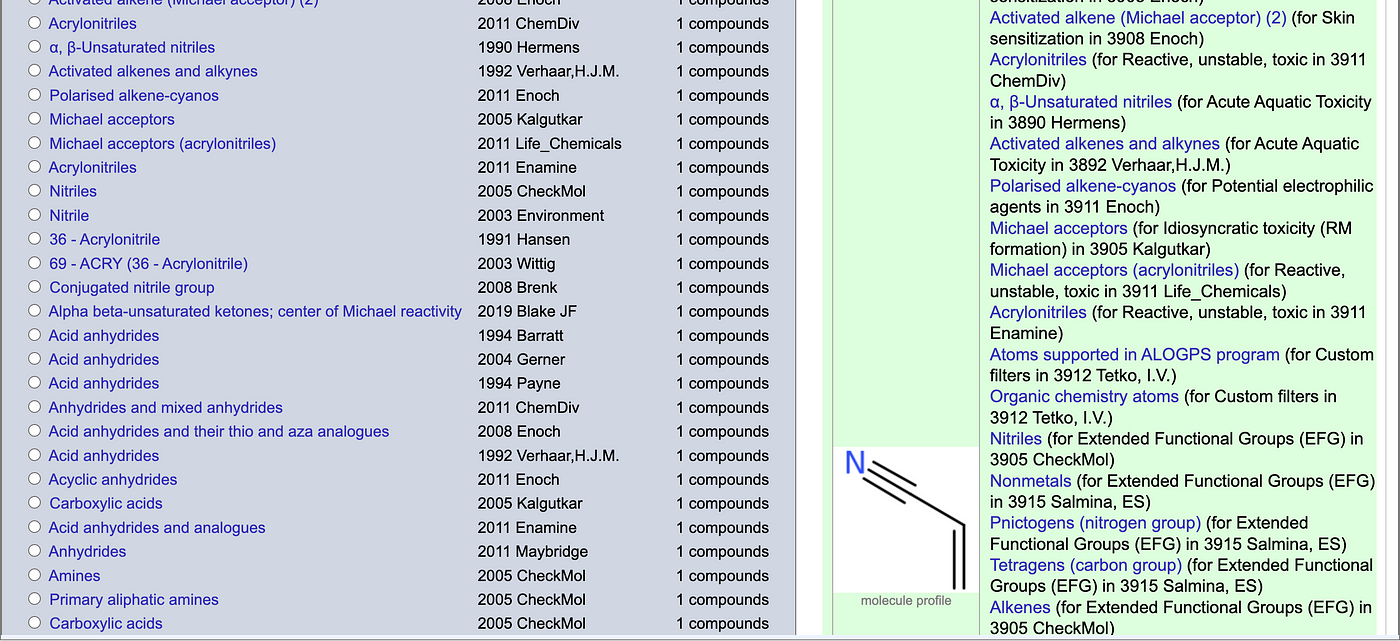


Data science offers powerful tools to enhance cosmetics inspection, from machine learning techniques that identify key ingredients and optimize formulations while maintaining quality and compliance, to data visualization for experimenting with "what-if" scenarios to find the best trade-offs between stability, homogeneity and cost, to predictive analytics that forecast ingredient popularity and consumer behavior to help brands stay ahead of trends, to analyzing production data to pinpoint factors affecting product quality and refine manufacturing processes for successful, desirable products - in short, data science provides the insights and foresight cosmetics companies need to develop innovative, high-performing offerings that meet evolving market demands.

In this notebook, we are going to create a content-based recommendation system where the 'content' will be the chemical components of cosmetics. Specifically, we will process ingredient lists for 1472 cosmetics on Sephora via word embedding, then visualize ingredient similarity using a machine learning method called t-SNE and an interactive visualization library called Bokeh. Let's inspect our data first.


In [1]:
#STEP-1
# importing libraries for TASK-1
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

#STEP-2
# loading the data using csv file
df = pd.read_csv("cosmetics.csv")

#STEP-3
#checking the first rows
#display a sample of five rows of the data using the sample() method insidethe display() function.
display(df.sample(5))


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
781,Treatment,DERMADOCTOR,Kakadu C ™ Serum,95,4.1,"Water, 3-O-Ethyl Ascorbic Acid, Ethoxydiglycol...",0,0,0,0,0
1172,Eye cream,AMOREPACIFIC,Intensive Vitalizing Eye Essence,95,3.9,"Camellia Sinensis Leaf Water, Butylene Glycol,...",1,1,1,1,1
475,Cleanser,KIEHL'S SINCE 1851,Cucumber Herbal Alcohol-Free Toner,16,4.1,"Water, Pentylene Glycol, Phenoxyethanol, Propy...",0,1,0,0,1
864,Face Mask,GLAMGLOW,The Ultimate Glow Set,169,0.0,-Charcoal: Detoxifies. -Volcanic Pumice: Exfol...,1,1,1,1,1
293,Moisturizer,LA MER,The Moisturizing Matte Lotion,270,3.9,"Water, Algae (Seaweed) Extract, Propanediol, S...",0,0,1,1,0


In [2]:
#STEP-4
#Display counts of types of product using the value_counts() method on the Label columnof df
print(df["Label"].value_counts())

Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Label, dtype: int64


# TASK 2 - Focus on one product category and one skin type 



In [3]:
# STEP 1- Filter for moisturizers
moisturizers = df[df["Label"]== "Moisturizer"]

# STEP 2- Filter for dry skin as well
moisturizers_dry= moisturizers[moisturizers["Dry"]==1]

# STEP 3- Reset index
moisturizers_dry = moisturizers_dry.reset_index(drop=True)

# TASK 3 - Tokenizing the ingredients 

In [4]:
# Initialise dictionary, list, and initial index
# STEP-1 :Inside the outer for loop:•Make each product's ingredients list lowercase.•Split the lowercase text into tokens by specifying ', ' as the separator.•Append tokens (which itself is a list) to the list corpus

ingredient_idx = {}
corpus =[]
idx= 0

# for loop

for i in range(len(moisturizers_dry)):
    ingredients = moisturizers_dry['Ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    corpus.append(tokens)
#STEP-2 :Inside the inner for loop, if the ingredient is not yet in ingredient_idx dictionary:•Add an entry to ingredient_idx with the key being the new ingredient and thevalue being the current idx value.•Increment idx by 1.
    for ingredient in tokens :
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient]=idx
            idx +=1
            
# checking result
print("The index for phenoxyethanol is", ingredient_idx['phenoxyethanol'])

The index for phenoxyethanol is 96


# TASK 4 - Initializing a document-term matrix (DTM) 

To initialize a document-term matrix (DTM) for analyzing the chemical components of Sephora products, first collect ingredient lists for a selection of products, treating each list as a "document." Next, create a corpus using text mining tools, then generate the DTM where rows represent products and columns represent unique ingredients, with cell values indicating frequency. Clean the DTM by filtering out common or uninformative ingredients, and then analyze it to identify prevalent ingredients, product similarities, and potentially harmful chemicals. Finally, visualize the results using tools like `ggplot2` or `matplotlib` to explore patterns in the data.

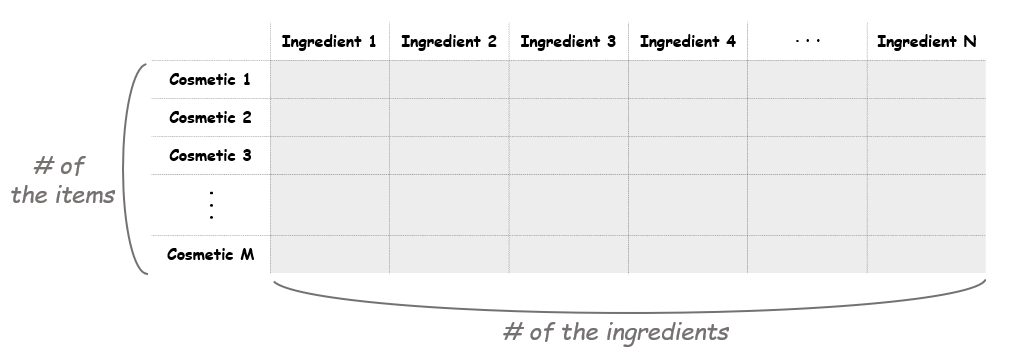

To create this matrix, we'll first make an empty matrix filled with zeros. The length of the matrix is the total number of cosmetic products in the data. The width of the matrix is the total number of ingredients. After initializing this empty matrix, we'll fill it in the following tasks.


In [5]:
# Get the number of items and tokens
M= len(moisturizers_dry)
N= len(ingredient_idx)

# Initialise a matrix of zeroes
A= np.zeros((M,N))

# TASK 5 - Creating a counter function


In [6]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x= np.zeros(len(ingredient_idx))
    for ingredient in tokens:
        # Get the index for each ingredient
        if ingredient in ingredient_idx:
            idx= ingredient_idx[ingredient]
            # Put 1 at the corresponding indices
            x[idx]=1
    return x

# TASK 6 -The Cosmetic-Ingredient matrix!

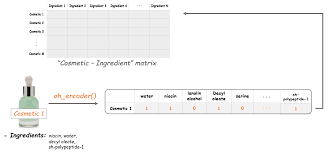

In [7]:
# Make a document-term matrix
i=0
for tokens in corpus:
    A[i] = oh_encoder(tokens)
    i += 1

#  TASK 7 -Dimension reduction with t-SNE


In [8]:
# Dimension reduction with t-SNE
model = TSNE(n_components=2, learning_rate=200, random_state=42)
tsne_features= model.fit_transform(A)

# Make X,Y columns
moisturizers_dry['X']= tsne_features[:,0]
moisturizers_dry['Y']= tsne_features[:,1]

# TASK 8 - Let's map the items with Bokeh


In [11]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Make a source and a scatter plot  
source = ColumnDataSource(moisturizers_dry)
plot = figure(x_axis_label = "T-SNE 1", 
              y_axis_label = "T-SNE 2", 
              width = 500, height = 400)
plot.circle(x = 'X', 
    y = 'Y', 
    source = source, 
    size = 10, color = '#FF7373', alpha = .8)



Loading BokehJS ...

GlyphRenderer(id='1185', ...)

# TASK 9 - Adding a hover tool

In [12]:
# Create a HoverTool object
hover= HoverTool(tooltips=[('Item','@Name'),
                          ('Brand','@Brand'),
                          ('Price','$@Price'),
                          ('Rank','@Rank')])
plot.add_tools(hover)

# TASK 10-  Mapping the cosmetic items

In [13]:
#Plotting the map
show(plot)

# TASK 11- Comparing two products

In [15]:
#Print the ingredients of two similar Cosmetics
cosmetic_1=moisturizers_dry[moisturizers_dry['Name']=="Color Control Cushion Compact Broad Spectrum SPF 50+"]
cosmetic_2=moisturizers_dry[moisturizers_dry['Name']=="BB Cushion Hydra Radiance SPF 50"]

#Display each item's data and ingredients
display(cosmetic_1)
print(cosmetic_1.Ingredients.values)
display(cosmetic_2)
print(cosmetic_2.Ingredients.values)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
45,Moisturizer,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,60,4.0,"Phyllostachis Bambusoides Juice, Cyclopentasil...",1,1,1,1,1,-9.419198,-335.968231


['Phyllostachis Bambusoides Juice, Cyclopentasiloxane, Cyclohexasiloxane, Peg-10 Dimethicone, Phenyl Trimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Alcohol, Arbutin, Lauryl Peg-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Polyhydroxystearic Acid, Sodium Chloride, Polymethyl Methacrylate, Aluminium Hydroxide, Stearic Acid, Disteardimonium Hectorite, Triethoxycaprylylsilane, Ethylhexyl Palmitate, Lecithin, Isostearic Acid, Isopropyl Palmitate, Phenoxyethanol, Polyglyceryl-3 Polyricinoleate, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Disodium Edta, Trimethylsiloxysilicate, Ethylhexyglycerin, Dimethicone/Vinyl Dimethicone Crosspolymer, Water, Silica, Camellia Japonica Seed Oil, Camillia Sinensis Leaf Extract, Caprylyl Glycol, 1,2-Hexanediol, Fragrance, Titanium Dioxide, Iron Oxides (Ci 77492, Ci 77491, Ci77499).']


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
55,Moisturizer,LANEIGE,BB Cushion Hydra Radiance SPF 50,38,4.3,"Water, Cyclopentasiloxane, Zinc Oxide (CI 7794...",1,1,1,1,1,-31.170496,-359.229309


['Water, Cyclopentasiloxane, Zinc Oxide (CI 77947), Ethylhexyl Methoxycinnamate, PEG-10 Dimethicone, Cyclohexasiloxane, Phenyl Trimethicone, Iron Oxides (CI 77492), Butylene Glycol Dicaprylate/Dicaprate, Niacinamide, Lauryl PEG-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Titanium Dioxide (CI 77891 , Iron Oxides (CI 77491), Butylene Glycol, Sodium Chloride, Iron Oxides (CI 77499), Aluminum Hydroxide, HDI/Trimethylol Hexyllactone Crosspolymer, Stearic Acid, Methyl Methacrylate Crosspolymer, Triethoxycaprylylsilane, Phenoxyethanol, Fragrance, Disteardimonium Hectorite, Caprylyl Glycol, Yeast Extract, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Trimethylsiloxysilicate, Polysorbate 80, Disodium EDTA, Hydrogenated Lecithin, Dimethicone/Vinyl Dimethicone Crosspolymer, Mica (CI 77019), Silica, 1,2-Hexanediol, Polypropylsilsesquioxane, Chenopodium Quinoa Seed Extract, Magnesium Sulfate, Calcium Chloride